
## Support Vector Regression 
### Data Analysis on Bitcoin Historical Data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as plt

import time
import datetime

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


'''
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
'''

'\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import confusion_matrix, accuracy_score\n'

In [2]:
##### read data #####
bitcoin=pd.read_csv("/Users/jinshuning/Documents/Semester6/CS5751/Project/data/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv")

FileNotFoundError: File b'/Users/jinshuning/Documents/Semester6/CS5751/Project/data/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2018-01-08.csv' does not exist

In [3]:
print (bitcoin.head())
print (bitcoin.shape)

    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price  
0            4.39  
1            4.39  
2            4.39  
3            4.39  
4            4.39  
(3161057, 8)


In [4]:
##### 1 Preprocessing #####

In [5]:
# unix timestamp to normal time
timestamp = [datetime.datetime.fromtimestamp(int(t)).strftime('%Y-%m-%d %H:%M:%S') for t in bitcoin['Timestamp']]

In [6]:
bitcoin['Timestamp'] =  timestamp

In [7]:
timestamp[:10]

['2011-12-31 01:52:00',
 '2011-12-31 01:53:00',
 '2011-12-31 01:54:00',
 '2011-12-31 01:55:00',
 '2011-12-31 01:56:00',
 '2011-12-31 01:57:00',
 '2011-12-31 01:58:00',
 '2011-12-31 01:59:00',
 '2011-12-31 02:00:00',
 '2011-12-31 02:01:00']

In [8]:
'''
start =  timestamp.index('2017-01-01 00:00:00')
end = timestamp.index('2018-01-01 00:00:00') 
print (start,end)
'''

"\nstart =  timestamp.index('2017-01-01 00:00:00')\nend = timestamp.index('2018-01-01 00:00:00') \nprint (start,end)\n"

In [9]:
# daily data
# from 2017-01-01 00:00:00 to 2018-01-01 00:00:00
timestamp_subset = [timestamp.index(t) for t in timestamp 
     if '00:00:00' in t and '2017-01-01 00:00:00'<=t<='2018-01-01 00:00:00']

In [10]:
subset =  bitcoin.iloc[timestamp_subset,]

In [11]:
subset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2625736,2017-01-01 00:00:00,963.74,963.74,963.74,963.74,0.050000,48.187000,963.740000
2627176,2017-01-02 00:00:00,1004.99,1004.99,1003.20,1003.20,0.240000,241.084929,1004.520539
2628616,2017-01-03 00:00:00,1020.06,1020.06,1020.06,1020.06,0.149640,152.641778,1020.060000
2630056,2017-01-04 00:00:00,1047.79,1047.79,1047.79,1047.79,0.279949,293.327323,1047.790000
2631496,2017-01-05 00:00:00,1120.19,1120.19,1120.12,1120.12,0.546098,611.724993,1120.173977
2632936,2017-01-06 00:00:00,980.06,980.06,980.03,980.06,4.517370,4427.254460,980.051302
2634376,2017-01-07 00:00:00,827.62,827.71,827.62,827.71,1.727000,1429.423670,827.691760
2635816,2017-01-08 00:00:00,931.47,931.54,930.11,930.11,2.139657,1992.860762,931.392796
2637256,2017-01-09 00:00:00,894.38,894.41,894.38,894.41,45.891034,41045.210235,894.405865
2638696,2017-01-10 00:00:00,894.23,894.23,894.23,894.23,13.000000,11624.990000,894.230000


In [180]:
x = subset['Close']

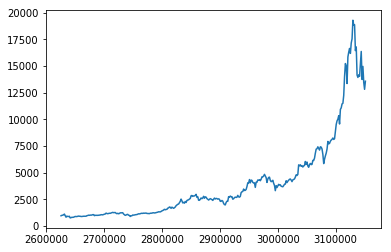

In [13]:
plt.plot(x)
plt.show()

In [243]:
# log transform to stablize variance
x_log =np.log(x)

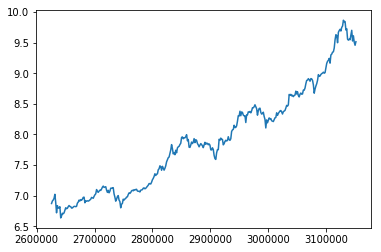

In [15]:
plt.plot(x_log)
plt.show()

In [17]:
##### 2 processing #####

In [18]:
# differencing
def differencing (x,d=1):
    tplus = x[1:]
    t = x[:-1]
    diff = list(np.array(tplus)-np.array(t))
    # recursion
    if d > 1: 
        diff = differencing (diff,d-1)
    return diff


In [183]:
#p: autoregression order for x (sliding window size)
def lag (x,p):
    t = len(x)
    n = t-p
    df = n 
    Y = x[p:t]
    #k = p+1
    X = np.matrix([float(0) for _ in range(n*p)]).reshape(n,p)
    for i in range(n):
        for j in range(p):
            X[i,j]=x[i+j]
    return X,Y

In [244]:
x_diff = differencing (x_log,d=1)
x_diff_binary = np.sign(x_diff)
print (x_diff_binary)

[ 1.  1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.
  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.
  1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
 -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1. -1.
  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.
  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1.
 -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
  1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.
  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.
  1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1

In [338]:
#X,y_dummy = lag(np.array(x),p=5)
#y = x_diff_binary[4:]
X,y_dummy = lag(x_diff,p=5)
y = np.sign(y_dummy)
#X,y = lag(x_diff_binary,p=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

print (len(X),len(y))
print (len(X_train),len(y_train))
print (len(X_test),len(y_test) )
train_size = len(X_train)
test_size = len(X_test)

X_trainn = np.array(X_train)
X_testt = np.array(X_test)

360 360
324 324
36 36


In [339]:
X_train, X_test

(matrix([[ 0.04012862,  0.01666656,  0.02682174,  0.06675264, -0.13357731],
         [ 0.01666656,  0.02682174,  0.06675264, -0.13357731, -0.16895094],
         [ 0.02682174,  0.06675264, -0.13357731, -0.16895094,  0.11664001],
         ...,
         [ 0.00577788,  0.02588638,  0.01315002,  0.0087524 ,  0.01502959],
         [ 0.02588638,  0.01315002,  0.0087524 ,  0.01502959, -0.01668865],
         [ 0.01315002,  0.0087524 ,  0.01502959, -0.01668865,  0.00893151]]),
 matrix([[ 0.0087524 ,  0.01502959, -0.01668865,  0.00893151,  0.08004008],
         [ 0.01502959, -0.01668865,  0.00893151,  0.08004008,  0.07156197],
         [-0.01668865,  0.00893151,  0.08004008,  0.07156197,  0.03409961],
         [ 0.00893151,  0.08004008,  0.07156197,  0.03409961,  0.01586073],
         [ 0.08004008,  0.07156197,  0.03409961,  0.01586073,  0.03179333],
         [ 0.07156197,  0.03409961,  0.01586073,  0.03179333, -0.07808481],
         [ 0.03409961,  0.01586073,  0.03179333, -0.07808481,  0.1337212

In [340]:
######################################
clf = SVM()

#clf = SVR(C=10, epsilon=0.01,gamma = 0.05, kernel = 'rbf')
#clf = SVR()
clf.fit(X_trainn, y_train)

     pcost       dcost       gap    pres   dres
 0: -3.0386e+02 -7.1046e+02  4e+02  2e-14  2e+00
 1: -6.3776e+02 -6.9608e+02  6e+01  3e-14  1e+00
 2: -4.8349e+03 -5.0336e+03  2e+02  2e-13  1e+00
 3: -1.1638e+05 -1.1680e+05  4e+02  5e-12  1e+00
 4: -3.1845e+07 -3.1846e+07  2e+03  5e-09  1e+00
 5: -6.1929e+11 -6.1929e+11  7e+05  1e-05  1e+00
 6: -1.9634e+12 -1.9634e+12  2e+06  5e-04  1e+00
Terminated (singular KKT matrix).
Found 324 support vectors.


In [341]:
y_pred_test= clf.predict(X_testt)
y_pred_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [342]:
clf.predict(X_trainn)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [343]:
accuracy_score(y_test,y_pred_test)

0.6666666666666666

In [344]:
### 3 recursive forecast: m step ahead ###

In [345]:
## 3.1 define a function ##

In [346]:
# m: m-step ahead forecast for y
# using recursive one-step-ahead strategy ??

def m_Forecast (m,last):
    y_pred_list = []
    past = last
    for i in range(m):
        y_pred = clf.predict(past)
        y_pred_list.append(y_pred[0])
        past = past[0][1:]
        past.append(y_pred[0]) 
        past=[past]
    return y_pred_list

In [347]:
# 3.2 Forecast on Data

In [348]:
# m-Step-Ahead
# Test Error
# MSE
last  = X_train[-1,].tolist(); print (last)
m = len(y_test)
y_pred_m = m_Forecast(m,last)
testm_acc = accuracy_score(y_test, y_pred_m) 
testm_acc#??

[[0.01315001919881098, 0.008752398925608418, 0.015029593425875731, -0.016688649794938115, 0.008931512495324867]]


0.6666666666666666

In [349]:
# Training Error
y_pred_train= clf.predict(X_trainn)
train_acc = accuracy_score(y_train, y_pred_train)
train_acc
# MSE
#train_mse = mean_squared_error(y_train, y_pred_train)
#print (train_mse)
                           

0.6203703703703703

In [350]:
y_pred_test= clf.predict(X_testt)
test_acc = accuracy_score(y_test, y_pred_test)
test_acc

0.6666666666666666

In [351]:
# 1-Step-Ahead
# Testing Error
y_pred_test= clf.predict(X_testt)
# MSE
#test_mse_1 = mean_squared_error(y_test, y_pred_test)
#print (test_mse_1)
#test_mape_1 = mape(y_test, y_pred_test)
#print (test_mape_1)

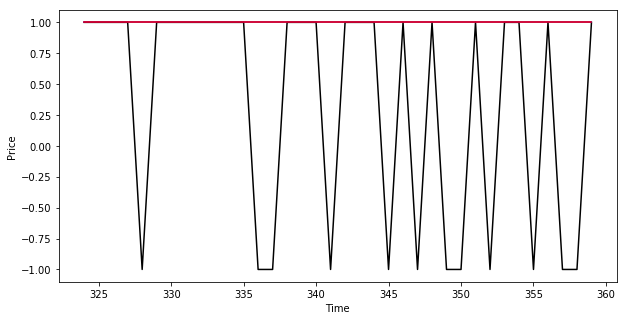

In [352]:
# Create some test data

secret_data_Y1 = y_pred_train
secret_data_Y2 = y_pred_test
secret_data_X2 = np.linspace(train_size,train_size+test_size-1,num = test_size)

secret_data_Y20 = y_test
secret_data_Y22 = y_pred_m

# Show the secret data
#plt.figure(dpi=1000,figsize=(10, 6))#

plt.rcParams["figure.figsize"] = [10,5]

plt.plot(secret_data_X2,secret_data_Y20,'black')
plt.plot(secret_data_X2,secret_data_Y2,'blue')
plt.plot(secret_data_X2,secret_data_Y22,'r')

plt.ylabel('Price')
plt.xlabel('Time')

plt.savefig('svm_fore.eps', format='eps', dpi=1000) 
plt.show()


In [353]:
# Quadratic constraint solver
import cvxopt.solvers

class SVM():
    """
    Fit the model to the data. Requires a 2D array of data X
    and a 1D array of corresponding class. Must all be floats!
    Returns nothing, but calculates internal variables in object.
    """
    def fit(self, X, y):

        # Scrape data size
        rows, columns = X.shape

        # Create the Gram matrix
        # P, q A, b, G, n from textbook, http://cvxopt.org/
        K = np.zeros((rows, rows))
        for i in range(rows):
            for j in range(rows):
                K[i,j] = np.dot(X[i], X[j])
        P = cvxopt.matrix(K * np.outer(y,y))
        q = cvxopt.matrix(-1 * np.ones(rows))
        A = cvxopt.matrix(y, (1,rows))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(-1 * np.diag(np.ones(rows)))
        h = cvxopt.matrix(np.zeros(rows))

        # Plug the Gram matrix into CVXOPT package
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Store lagrange multipliers from solvers.qp
        # Ravel returns a contiguous flattened array.
        lag_mult = np.ravel(solution['x'])

        # Avoid machine precision errors.
        # Lagrange multipliers must be greater than zero.
        sup_vec = lag_mult > 1e-6

        # Arange returns evenly spaced values within a given interval.
        lagrange_indexes = np.arange(len(lag_mult))[sup_vec]

        # Build an array of our lagrange multipliers that were greater than zero.
        self.lag_mult = lag_mult[sup_vec]

        # Store data points at associated support vector data points.
        self.sup_vec= X[sup_vec]
        self.sv_y = y[sup_vec]

        print("Found " + str(len(self.lag_mult)) + " support vectors.")

        # Find the intercept of our hyperplane
        self.b = 0
        for n in range(len(self.lag_mult)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.lag_mult * self.sv_y * K[lagrange_indexes[n], sup_vec])
        self.b /= len(self.lag_mult)

        # Calculate the weight W
        self.w = np.zeros(columns)
        for n in range(len(self.lag_mult)):
            self.w += self.lag_mult[n] * self.sv_y[n] * self.sup_vec[n]


    """
    Attempt to classify a new point. X must be in the same format
    as above, a 2D array of floats.
    """
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

def plot_margin(X1_train, X2_train, clf):
    def f(x, w, b, c=0):
        # given x, return y such that [x,y] in on the line
        # w.x + b = c
        return (-w[0] * x - b + c) / w[1]

    pl.plot(X1_train[:,0], X1_train[:,1], "ro")
    pl.plot(X2_train[:,0], X2_train[:,1], "bo")
    pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

    # w.x + b = 0
    a0 = -4; a1 = f(a0, clf.w, clf.b)
    b0 = 4; b1 = f(b0, clf.w, clf.b)
    pl.plot([a0,b0], [a1,b1], "k")

    # w.x + b = 1
    a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
    b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
    pl.plot([a0,b0], [a1,b1], "k--")

    # w.x + b = -1
    a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
    b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
    pl.plot([a0,b0], [a1,b1], "k--")

    pl.axis("tight")
    pl.show()
    